In [1]:
import numpy, math
from matplotlib import pyplot as plt
from matplotlib import patches
from src import code_toggle
%matplotlib inline

# Warm-up exercises

\begin{align*}
&1. \quad \frac{[1.6 \times 10^{-19}]^2}{4 \times \pi \times 8.85 \times 10^{-12} \times [10^{-10}]^2} &=\\
&2. \quad \frac{0.01}{50} &=\\
&3. \quad \frac{1.5 \times 10^{-10}}{30} &=\\
&4. \quad \text{if } \frac{dy}{dx} = 4 \text{ find } y &=\\
&5. \quad \frac{4 \times 10^6}{6.2 \times 10^{-4}} &=\\
&6. \quad \frac{0.000008}{0.0008} &=\\
&7. \quad \frac{6.1 \times 10^{-2}}{8 \times 10^4} &=\\
&8. \quad \ln \frac{N}{N} &=\\
&9. \quad \int^\infty_0 \frac{1}{e^x}.dx &=\\
&10. \quad \text{if } \frac{dy}{dx} = 4x^2 + e^{-x} \text{ find } y &=\\
\end{align*}

11. If I have a 0.02 M solution made by adding 0.29 g NaCl (the molar mass of NaCl is approximately 58 g) to some water, what is the volume of my solution?

# Differential Equations (cont.)

## Example

A circular patch of oil on the surface of some water has a radius $r$ metres at time $t$ minutes. 
When $t=0$ minutes, $r=1$m and when $t=10$ minutes, $r=2$m.

### (a) Predict the value $T$ of $t$ when $r=4$m, using a simple model in which the rate of increase of $r$ is taken to be constant. Find $T$ for this model


The above tells us that 

\begin{align*}
\frac{dr}{dt} &= c \quad&\text{INTEGRATE w.r.t time}\\
\int\frac{dr}{dt}.dt &= c \int.dt\\
\int dr &= c \int dt\\
r &= ct + k\\
\end{align*}

where $c$ and $k$ are constants. We need to apply the *boundary conditions* to find out their values. Since there are two unknowns we need two conditions since each will give us a simultaneous equation.

Applying the boundary conditions we are given $(t=0, r=1)$ and $(t=10,r=2)$

\begin{align*}
1 &= c.0 + k\\
2 &= 10c + k
\end{align*}

The first yields $k=1$. Substitute into the second and we get 

\begin{align*}
2 &= 10c + 1\\
10c &= 1\\
c&=\frac{1}{10}
\end{align*}

Hence our solution is 

$$\boxed{r = \frac{t}{10} + 1}$$

To predict when the patch will grow to reach $r=4$, we simply substitute into the above model

\begin{align*}
4 &= \frac{T}{10} + 1\\
3 &= \frac{T}{10}\\
T &= 30 \text{ min}\\
\end{align*}



### (b) In a more refined model, the rate of increase of $r$ is taken to be proportional to $1/r$. Express this statement as a differential equation and find the general solution. Find $T$ for this model

This time our differential equation is 

\begin{align*}
\frac{dr}{dt} &= \frac{B}{r} \quad&\text{SEPARATE}\\
r \frac{dr}{dt} &= B \quad&\text{INTEGRATE w.r.t time}\\
\int r.dr &= B \int dt\\
\frac{r^2}{2} &= Bt + c\\
r^2 &= Dt + E \quad&\text{where $D$ and $E$ are constants}\\
\end{align*}


We apply the same boundary conditions as before:

\begin{align*}
1 &= D.0 + E\\
4 &= 10D + E\\
\end{align*}

The first equations yields  $E=1$ and hence

\begin{align*}
4 &= 10D + 1\\
3 &= 10D\\
D &= \frac{3}{10}
\end{align*}

Hence our solution for this more refined model is 

$$\boxed{r^2 = \frac{3t}{10} + 1}$$

To predict when the patch will grow to reach $r=4$, we simply substitute into the above model

\begin{align*}
16 &= \frac{3t}{10} + 1\\
15 &= \frac{3t}{10}\\
150 &= 3t\\
t &= 50 \text{ min}
\end{align*}

### (c) Compare the two models by sketching $r(t)$ on the same figure  

As you can see in the sketch below, in the regime $0 \le t \le 10$ min which is where the boundary conditions were measured, these two models are very similar. As $t$ increases, however, they diverge leading to different predictions for when $r=4$ m. This is very typical for predictive models!

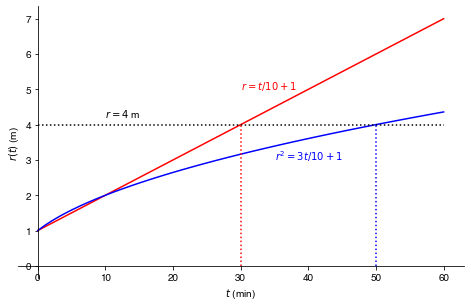

In [20]:
t = numpy.linspace(0, 60, 60)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

axis.set_xlabel('$t$ (min)')
axis.set_ylabel('$r(t)$ (m)',rotation=90)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func1(t):
    return((t/10)+1)

def func2(t):
    return(((3*t/10)+1)**0.5)

y1=func1(t)
y2=func2(t)


axis.annotate('$r=4$ m',xy=(10,4.2),c='k')
axis.annotate('$r=t/10+1$',xy=(30,5),c='r')
axis.annotate('$r^2=3t/10+1$',xy=(35,3),c='b')
axis.plot(t, y1,'r-')
axis.plot(t, y2,'b-')
axis.plot([0,60],[4,4],'k:')
axis.plot([30,30],[0,4],'r:')
axis.plot([50,50],[0,4],'b:')
plt.show()

code_toggle()

## First-order processes (growth)

A process reaction where A is growing and the rate of change of A depends only on the amount of A present at time $t$ is described by the following rate law

$$\frac{d[A]}{dt} = k[A]$$

where $[A]$ is the concentration of $A$ and it varies with time, $t$. 

An example is bacterial growth, where, given sufficent nutrients, the growth rate will only depend on the number of bacteria at time. $t$. Let's solve this equation

\begin{align*}
\frac{d[A]}{dt} &= k[A] &\quad&\text{SEPARATE variables}\\
\frac{1}{[A]}. \frac{d[A]}{dt} &= k &\quad&\text{INTEGRATE both sides w.r.t time}\\
\int \frac{1}{[A]}. \frac{d[A]}{dt}.dt &= \int k.dt  &\quad&\text{INTEGRATE both sides w.r.t time}\\
\int \frac{1}{[A]}. d[A] &= k \int dt  \\
\ln [A] &= kt + c\\
\end{align*}


Let's assume we know the *intial condition* i.e. that when $t=0$, $A=A_0$. Then we can substitute these into the general solution above and get

\begin{align*}
\ln [A_0] &= k.0 + c\\
c &= \ln [A_0]
\end{align*}

Hence

\begin{align*}
\ln [A] &= kt + \ln [A_0]\\
\ln [A] - \ln [A_0] &= kt\\
\ln \frac{[A]}{[A_0]} &= kt &\quad&\text{exponentiate both sides}\\
e^{\ln \frac{[A]}{[A_0]}} &= e^{kt}\\
\frac{[A]}{[A_0]} &= e^{kt}\\
[A] &= [A_0]e^{kt}
\end{align*}



Whilst the above solution is true, if we have measured $[A]$ at different times, $t$ and want to calculate $[A_0]$ and $k$, then we need to transform the general exponential solution so it is in the form of a straight line $y=mx+c$. Fortunately, if we look through our working we see we've already done this. 

$$ \ln [A] = kt + \ln [A_0]$$

i.e. a plot of $\ln[A]$ against $t$ should give a straight line with gradient $k$ and y-intercept $\ln [A_0]$. If it isn't a straight line then it might not be a first-order process!



Instead of applying a specific initial condition like $(t=0,[A]=[A_0])$, we can instead apply a general initial condition $(t=t_0,[A]=[A_0])$. 

\begin{align*}
\ln [A] &= kt+ c\\
\ln [A_0] &= kt_0 +c\\
c&= \ln [A_0]-kt_0\\
\end{align*}

Let's substitute this back in

\begin{align*}
\ln[A] &= kt + \ln[A_0] - kt_0\\
\ln[A] - \ln[A_0] &= k(t-t_0)\\
\ln\frac{[A]}{[A_0]}  &= k(t-t_0)\\
\frac{[A]}{[A_0]} &= e^{k(t-t_0)}\\
[A] &= [A_0]e^{k(t-t_0)}\\
\end{align*}

$$\boxed{[A] = [A_0]e^{k(t-t_0)}}$$

This is a general solution based on you knowing $(t=t_0,[A]=[A_0])$. If $t_0=0$ then we get back our earlier solution.

<div class="alert alert-block alert-warning">
<img src="images/thinking-face.png" width=50 title="Hmm" style="vertical-align:top"/>
<b>Thought:</b> You might have noticed that when we integrated $\int 1/[A]. dx$ we put $ln [A] + c$ rather than $\ln |[A]| +c$. This is because $[A]>0$ and so the modulus operator is not needed.
</div>

### A numerical example

If there are $N_0$ bacteria at $t=0$ and $3N_0$ at $t=10$ hours, how long will it take for there to be $11N_0$?

Looking above, the appropriate equation, assuming this is first-order and the form of the initial condition we have, is

\begin{align*}
N &= N_0e^{kt}
\end{align*}

First, let's find $k$ by substituting in $t=10, N=3N_0$.

\begin{align*}
3N_0 &= N_0e^{10k}\\
3 &= e^{10k} \quad\text{take natural logs of both sides}\\
\ln 3 &= \ln e^{10k}\\
\ln 3 &= 10k\\
k &= \frac{1}{10}\ln 3\\
&= 0.110 \text{ hour}^{-1}
\end{align*}


<div class="alert alert-block alert-warning">
<img src="images/thinking-face.png" width=50 title="Hmm" style="vertical-align:top"/>
<b>Thought:</b> The units of $k$ must be time$^{-1}$ so that $kt$ is dimensionless since you cannot exponentiate a quantity with dimensions.
</div>

Hence to find how long it will take for the population to growth by $11\times$ we must solve

\begin{align*}
11N_0 &= N_0 e^{0.110t}\\
11 &= e^{0.110t}\\
\ln 11 &= 0.110 t\\
t = \frac{1}{0.110}\ln 11\\
t = 21.8 \text{ hours}
\end{align*}

<div class="alert alert-block alert-warning">
<img src="images/thinking-face.png" width=50 title="Hmm" style="vertical-align:top"/>
<b>Thought:</b> Notice how I quoted $k$ to 3.s.fs and hence that also limits the precision to which I can quote the time.
</div>

## First-order processes (decay)

Here the rate law is exactly the same except for the introduction of a minus sign. We could simply allow $k$ to take a negative value, but by convention $k>0$ hence the minus sign

$$
\frac{d[A]}{dt} = -k [A]
$$

Any example of a first-order decay process is *radioactive decay*.

\begin{align*}
\frac{d[A]}{dt} &= -k[A] &\quad&\text{SEPARATE variables}\\
\frac{1}{[A]}. \frac{d[A]}{dt} &= -k &\quad&\text{INTEGRATE both sides w.r.t time}\\
\int \frac{1}{[A]}. \frac{d[A]}{dt}.dt &= \int -k.dt  &\quad&\text{INTEGRATE both sides w.r.t time}\\
\int \frac{1}{[A]}. d[A] &= -k \int dt  \\
\ln [A] &= -kt + c\\
\end{align*}

Let's assume we know the *intial condition* i.e. that when $t=0$, $A=A_0$. Then we can substitute these into the general solution above and get

\begin{align*}
\ln [A_0] &= -k.0 + c\\
c &= \ln [A_0]
\end{align*}

Hence

\begin{align*}
\ln [A] &= -kt + \ln [A_0]\\
\ln [A] - \ln [A_0] &= -kt\\
\ln \frac{[A]}{[A_0]} &= -kt &\quad&\text{exponentiate both sides}\\
e^{\ln \frac{[A]}{[A_0]}} &= e^{-kt}\\
\frac{[A]}{[A_0]} &= e^{-kt}\\
[A] &= [A_0]e^{-kt}
\end{align*}


Again we had measured [A] at several timepoints, $t$, we can plot a transformed version of the above to find out $k$ and $[A_0]$ and we've already written one down as part of our working:

$$\ln [A] = -kt + \ln [A_0]$$

Hence a plot of $\ln [A]$ against $t$ has gradient $-k$ and y-intercept $\ln [A_0]$.

A more general solution where the initial condition is $(t=t_0, [A]=[A_0])$ is 

$$\boxed{[A] = [A_0]e^{-k(t-t_0)}}$$

which is identical to our general solution for first-order growth, except we have $-k$ instead of $k$ in the index of the exponential. Setting $t_0=0$ reduces this to our previous expression.

### Half-life (for first-order decay processes)

Radioactive decay is often written in this form

$$N_t = N_0 e^{-\lambda(t-t_0)}$$

where $N_t$ is the number of atoms at time $t$, $N_0$ is the number of atoms at $t=t_0$ and $\lambda$ is the 'decay constant'.

A useful quantity to measure is the time taken for the number of atoms to halve i.e. to reduce from $[N]$ to $[N]/2$. This is called the *half-life*. 

Hence $[N] = \frac{[N_0]}{2}$ when $t=t_0 + t_{1/2}$. Substituting these into the above equation we get

\begin{align*}
\frac{N_0}{2} &= N_0 e^{-\lambda(t_0+t_{1/2}-t_0)}\\
\frac{1}{2} &= e^{-\lambda t_{1/2}} &\quad&\text{take natural logs of both sides}\\
\ln \left(\frac{1}{2} \right) &= -\lambda t_{1/2} &\quad&\text{applying a log law}\\
\ln 2 &= \lambda t_{1/2}\\
t_{1/2} &= \frac{\ln 2}{\lambda}\\
&= \frac{0.693}{\lambda}
\end{align*}



<div class="alert alert-block alert-warning">
<img src="images/thinking-face.png" width=50 title="Hmm" style="vertical-align:top"/>
<b>Thought:</b> The half-life is independent of the concentration
</div>

hence we can rewrite this as 

$$N = N_0 e^{\ln 2(t-t_0)/t_{1/2}}$$



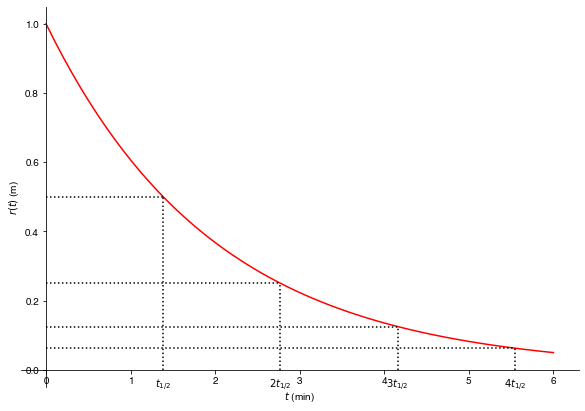

In [43]:
t = numpy.linspace(0, 6, 60)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(10,7))

axis.set_xlabel('$t$ (min)')
axis.set_ylabel('$r(t)$ (m)',rotation=90)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func(t):
    return(numpy.exp(-0.5*t))

y=func(t)


axis.annotate('$t_{1/2}$',xy=(1.386,-0.05),c='k',ha='center')
axis.annotate('$2t_{1/2}$',xy=(2.772,-0.05),c='k',ha='center')
axis.annotate('$3t_{1/2}$',xy=(4.158,-0.05),c='k',ha='center')
axis.annotate('$4t_{1/2}$',xy=(5.545,-0.05),c='k',ha='center')

# axis.annotate('$r=t/10+1$',xy=(30,5),c='r')
# axis.annotate('$r^2=3t/10+1$',xy=(35,3),c='b')
axis.plot(t, y,'r-')
# axis.plot(t, y2,'b-')
axis.plot([0,1.386],[0.5,0.5],'k:')
axis.plot([1.386,1.386],[0,0.5],'k:')
axis.plot([0,2.772],[0.25,0.25],'k:')
axis.plot([2.772,2.772],[0,0.25],'k:')
axis.plot([0,4.158],[0.125,0.125],'k:')
axis.plot([4.158,4.158],[0,0.125],'k:')
axis.plot([0,5.545],[0.0625,0.0625],'k:')
axis.plot([5.545,5.545],[0,0.0625],'k:')
# axis.plot([30,30],[0,4],'r:')
# axis.plot([50,50],[0,4],'b:')
plt.show()

code_toggle()

## Doubling-time (for first-order growth processes)

The analogous quantity for a first-order growth process is the *doubling time* which is often used to characterise the growth of bacterial populations that are unconstrained by nutrient supply. In exactly the same way, the doubling time purely depends on $k$ and is independent of the number of bacteria.

More topically, it is also used in epidemiology to describe how quickly an infection is spreading through a population.

## Decay example

The element radium (A=226) has a decay constant ($\lambda$) of 13.6 $\times 10^{-12}$ s$^{-1}$. How many disintegrations per second will 1 g of radium produce? The half-life of radium is 1,662 years.

1 g of radium contains 

$$\frac{6.02 \times 10^{23}}{226} = 2.66 \times 10^{21} \text{ atoms}$$

\begin{align*}
\frac{d[N]}{dt} &= -\lambda [N]\\
&= 13.6 \times 10^{-12} \times 2.66 \times 10^{21}\\
&= 3.6 \times 10^{10} \text{ disintegrations/sec}
\end{align*}

Marie Curie studied radtioactivity (including coining the term) and discovered polonium and radium  for which she won the Nobel Prize in Chemistry in 1911. In recognition of this, the unit of radioactivity is called the *Curie* which is $3.7 \times 10^{10}$ disintegrations per second.

## Epidemiology example

As of 9 November 2020, the doubling time for SARS-Covid-2019 deaths in the U.K. was 195 days. This is almost twice that of the world average, which was 109 days. Assuming those doubling times remain constant and noting that the current deaths from Covid are 49,770 and 1.27 million in the UK and worldwide, respectively.

How many people would we predict to die in the UK and worldwide by the end of the year?

There are 21+31=62 days left in the year. 

$$N=N_0e^{\lambda t}$$

where $\lambda = \ln 2/t_{double}$

So $\lambda_{\text{UK}} = 3.55 \times 10^{-3}$ per day and $\lambda_{\text{world}} = 6.36\times 10^{-3}$ per day.

\begin{align*}
N_{\text{UK}} &= 49770\times e^{3.55 \times 10^{-3} \times 62}\\
&= 62,000 \text{ 3.s.f}\\
N_{\text{world}} &= 1,270,000\times e^{6.36 \times 10^{-3} \times 62}\\
&= 1.88 \text{ million (3.s.f)}
\end{align*}


What would happen if the doubling time was twice as long? That is equivalent to $\lambda$ being halved, hence

\begin{align*}
N_{\text{UK}} &= 49770\times e^{0.5*3.55 \times 10^{-3} \times 62}\\
&= 55,600 \text{ 3.s.f}\\
N_{\text{world}} &= 1,270,000\times e^{0.5*6.36 \times 10^{-3} \times 62}\\
&= 1.54 \text{ million (3.s.f)}
\end{align*}


